# Case Study: Resale Price Forecasting in an IT Leasing Context
<hr>

## Data integration

Write a function to create synthetic data that matches the context of IT leasing:

Examples of features to include:
- Feature Brand (description of the item, e.g., Dell XPS 15')
- Feature Type (e.g., notebook, desktop, server)
- Feature Age (age of the item in months when returned, often 12, 24, 36, also include some outliers)
- Feature List-Price (original list price of the item)

Other features describing the item...

Other features describin the client and conditions in which the item will be used. 

**Template for the following tasks:** https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/3_nb_predictive_analytics.ipynb


**For Saloni: use for now California Housing**
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
## Data Exploration

- Descriptive statistics
    - Focus on key features (e.g., target, age)
    - Showcase how to calc descriptives for all features
- Plots (same as before but graphically)
    - start with popular plots for individual features (e.g, histogram, box-plot)
    - correlation among numerical features (heat-map)
    - other ways to visualize all features (e.g., matrix of histograms/box-plots, etc.)
    
## Explanatory Model
- Run linear regression using statsmodels
- show summary 
- plot residuals (see template)

## Predictive Model
- Use linear model from above to predict some new (test) cases
- compute rmse
- XGB model
    - Do a grid-search to identify suitable meta-parameters
    - Use final XGB model to predict same test case and compute rmse

## Post-hoc analysis
- Produce feature importance plot for the XGB model
- Compare feature importance to linear regression
- Produce partial dependence plot one one feature for XGB and linear regression to show the difference



okground information for each section of the Jupyter Notebook tutorial focused on the California Housing dataset. It's designed to be educational for students new to Python and data analysis.

# Tutorial 2: Case_study 

## Introduction to Data Analysis with the California Housing Dataset

In this tutorial, we will explore the California Housing dataset, a popular dataset for regression analysis. We will cover data exploration, building an explanatory linear regression model, creating predictive models using both linear regression and XGBoost, conducting post-hoc analysis, and drawing conclusions based on our analysis.


# Section 1: Data Exploration

## Loading  the California Housing Dataset
In this section, we will load the California Housing dataset.The California Housing dataset provides a snapshot of housing characteristics in various California districts. It centers on predicting median house values, with features like median income, housing age, room and bedroom averages, population, occupancy, and geographical coordinates. This dataset is a staple for regression analysis, showcasing real-world applications and challenges in predicting housing prices based on socioeconomic and geographic factors.

In [3]:
from sklearn.datasets import fetch_california_housing

#The code imports the fetch_california_housing function from the sklearn.datasets module. It is used to load the California Housing dataset 
#into a variable called california_housing


california_housing = fetch_california_housing(as_frame=True)

#The as_frame=True parameter specifies that the dataset should be loaded into a pandas DataFrame format, making it easier to work with and 
#analyze the data using pandas functions and features.

##### Tip: if you get " ModuleNotFoundError: ... " This means your system doesnt not have a particular python package.
Python packages are best installed using pip commands.
Simply run "pip install <package>" this should installed the package and resolve the error on next run

## Taking a look the California Housing Dataset

Lets take a look at the description of the dataset, using below method

In [4]:
print(california_housing.DESCR)

#The code print(california_housing.DESCR) is used to display a description of the California Housing dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Lets have look at entire dataset

In [5]:
california_housing.frame.head()

#The  is used to display the first few rows of the California Housing dataset after it has been loaded into a pandas DataFrame format

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


 We can now check more into details the data types and if the dataset contains any missing value.

In [6]:
california_housing.frame.info()

#The code is used to obtain information about the structure and characteristics of the California Housing dataset, which has been loaded into 
# a pandas DataFrame format. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Descriptive Statistics

Descriptive statistics provide a summary of the dataset's key characteristics, helping us understand the distribution, central tendency, and spread of the data.


 But first, Lets first extract the data and assign it to a data frame

In [7]:
data = california_housing.frame

#The code `data = california_housing.frame` assigns the DataFrame containing the California Housing dataset to a new variable named `data`.

In [8]:
# Calculate descriptive statistics for key features

key_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
#The variable `key_features` stores a list of important feature names selected from the California Housing dataset.

key_features_statistics = data[key_features].describe()
#Computes summary statistics for the specified key features, creating a new DataFrame named key_features_statistics.

In [7]:
# Display the statistics for key features

print("Descriptive Statistics for Key Features:")
print(key_features_statistics)

Descriptive Statistics for Key Features:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000

## Plots
Now, let's create graphical plotst)

In [9]:
#This code imports essential libraries such as pandas, numpy, matplotlib, 
#seaborn, and suppresses future warnings, setting up the environment for data analysis and visualization.import pandas as pd

import numpy as np
import matplotlib.pyplot as plt  # Import the plt module for plotting
import seaborn as sns

#to subress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

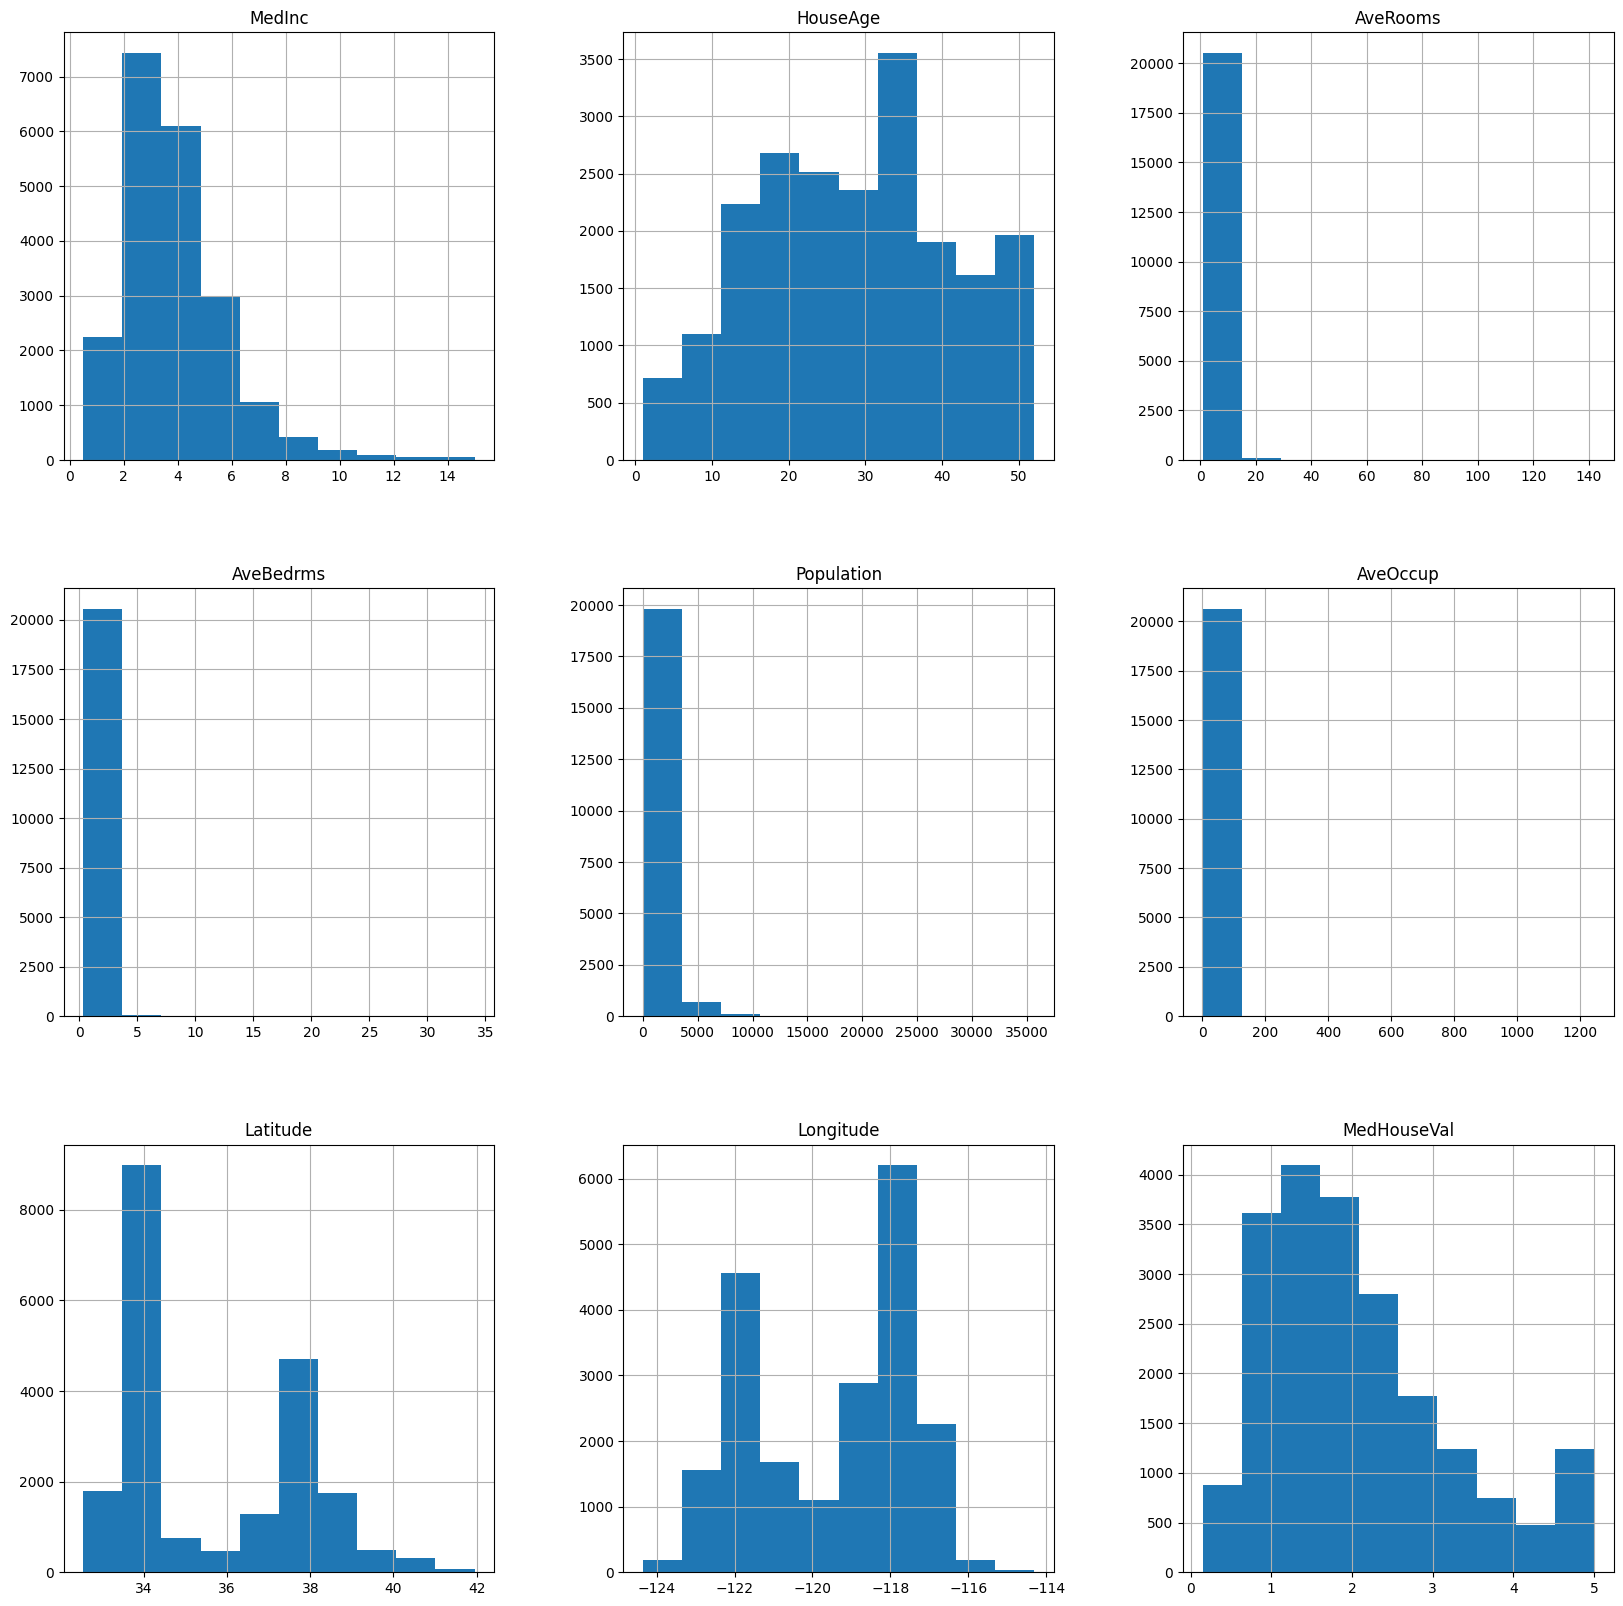

In [10]:
california_housing.frame.hist(figsize=(20,20))
#This code generates histograms for each numeric column in the California Housing dataset, creating a grid of histograms with a specified figure size 
#of 20x20 for better visualization.

In [12]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  

In [13]:
# Other ways to visualize all features (e.g., matrix of histograms/box-plots)

# Select a subset of numerical features for visualization
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

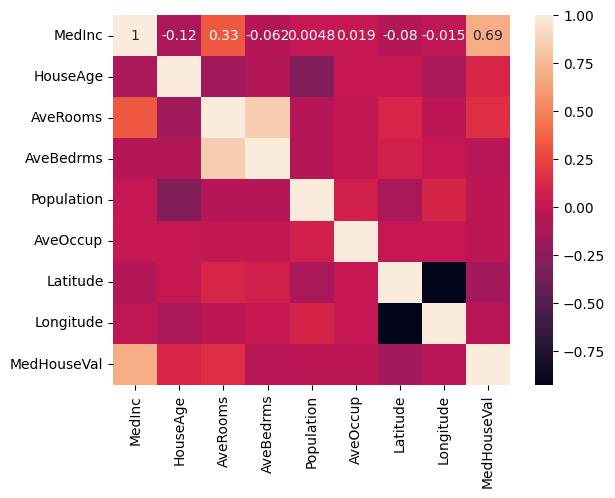

In [14]:
 df=california_housing.frame 
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), annot=True)
  
# displaying heatmap
mp.show()

In [ ]:
# Interpretation:
# - We started by creating a histogram for the 'MedInc' (Median Income) feature to visualize its distribution.
# - Next, we created a box plot for the 'HouseAge' feature to understand its central tendency and spread.
# - The correlation heatmap provides a graphical representation of the relationships among numerical features.
# - Finally, we used a matrix of histograms and box plots to visualize the distribution and relationships of all selected numerical features.

#These visualizations help in understanding the data distribution, identifying outliers, and exploring relationships between features in the 
#California Housing dataset.

# Section 2: Explanatory Model
## Run linear regression using statsmodels

In [19]:
# Define the target variable and predictor(s)
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = data[selected_columns]

y = data['MedHouseVal']

In [20]:
# Add a constant (intercept) term to the predictor(s)
import statsmodels.api as sm
X = sm.add_constant(X)

In [21]:
# Create a linear regression model
model = sm.OLS(y, X).fit()

In [22]:
# Show summary of the linear regression model
print("Linear Regression Summary:")
print(model.summary())

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:15:33   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419    

In [ ]:
# Interpretation:
# - We first specify the target variable 'y' (median house value) and the predictors ('X').
# - We add a constant term to the predictors to include the intercept in the model.
# - The `sm.OLS()` function fits a linear regression model.
# - The `model.summary()` method displays a summary of the regression results, including coefficients, p-values, R-squared, and more.

In [ ]:
# Plot Residuals
# Residuals are the differences between the actual and predicted values of the target variable.

In [23]:
# Calculate residuals
residuals = model.resid

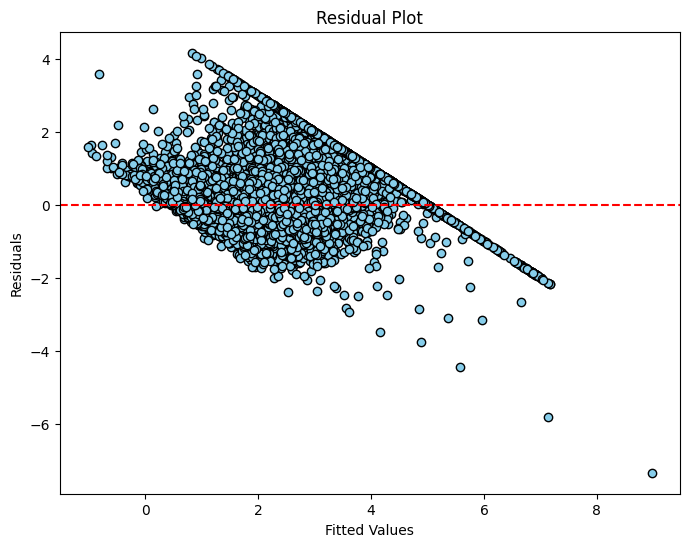

In [24]:
# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, color='skyblue', edgecolor='black')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [ ]:
# Interpretation:
# - Residuals represent the errors in our model's predictions.
# - In the residual plot, we check if the residuals are randomly scattered around zero, which is a good sign.
# - A pattern in the residuals could indicate a problem with the model.

# Section 3: Predictive Model

In [25]:
# Assuming you have already trained the linear regression model (as shown in the previous section), let's continue.
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#This code splits the dataset into training and testing sets, with `X` representing the input features and `y` representing the target variable. 
#The split ratio is 80% for training and 20% for testing, and the `random_state=42` ensures reproducibility of the split.


In [27]:
# Use the trained linear regression model to make predictions on the test set
linear_predictions = model.predict(X_test)

In [28]:
# Compute Root Mean Squared Error (RMSE) for the linear model
from sklearn.metrics import mean_squared_error

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Model RMSE:", linear_rmse)

Linear Model RMSE: 0.738950387483289



Explanation:

We split the dataset into training and testing sets using train_test_split. The test_size parameter determines the proportion of data used for testing.
We use the trained linear regression model (model) to make predictions on the test set (X_test).
RMSE is computed using mean_squared_error from scikit-learn to evaluate the model's performance on the test data.
XGBoost Model with Grid Search
Now, we'll build an XGBoost model and perform a grid search to find suitable hymeters.perpara

In [29]:
# Import necessary libraries for XGBoost and Grid Search
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [83]:
# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

In [85]:
# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best XGBoost model from the grid search
best_xgb_model = grid_search.best_estimator_

# Use the best XGBoost model to make predictions on the test set
xgb_predictions = best_xgb_model.predict(X_test)

# Compute RMSE for the XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Print the RMSE
print("XGBoost Model RMSE:", xgb_rmse)


XGBoost Model RMSE: 0.46347218066353657


In [ ]:

Explanation:

We define a parameter grid (param_grid) that specifies a range of hyperparameters for the XGBoost model.
We create an XGBoost regressor (xgb_regressor) that we will use for the grid search.
Grid search (GridSearchCV) is performed with cross-validation to find the best combination of hyperparameters.
The best XGBoost model is obtained from the grid search results.
We use the best XGBoost model to make predictions on the test set (X_test) and compute the RMSE.
This code helps you build an XGBoost model with optimized hyperparameters and evaluates its performance using RMSE on thea.






# Section 4: Post-hoc analysis

##### Post-hoc analysis is an essential step in understanding the performance of your models and the importance of different features. In this case, we'll perform post-hoc analysis on both an XGBoost model and a Linear Regression model for the California Housing dataset. We'll create feature importance plots and partial dependence plots to compare the two models.



 1. Produce Feature Importance Plot for the XGBoost Model:**

Feature importance helps us understand which features have the most impact on the model's predictions. XGBoost provides a built-in feature importance attribute that we can use to plot the feature importan do 



# Get feature importances from the XGBoost model
feature_importance_xgb = xgb_regressor.feature_importanc

In [89]:
#Get feature importances from the XGBoost model
feature_importance_xgb = xgb_regressor.feature_importances_


In [88]:
# Fit the XGBoost model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

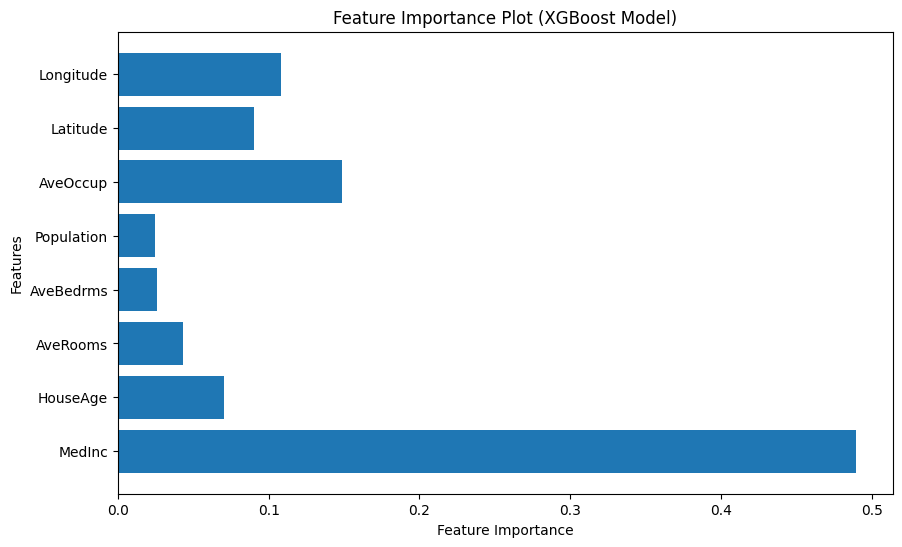

In [90]:
# Create a feature importance plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_xgb)), feature_importance_xgb, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (XGBoost Model)')
plt.show()

####Explanation:

We first fit an XGBoost regressor on the training data.
Then, we extract the feature importances using xgb_regressor.feature_importances_.
Finally, we create a horizontal bar plot to visualize the feature importance scores.

####  Compare Feature Importance to Linear Regression:

To compare feature importance between the XGBoost model and Linear Regression, you can create a similar plot for the Linear Regression model and visually compare the two. Here's how you can do it:

In [92]:
# Fit the Linear Regression model
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [93]:
# Get feature coefficients from the Linear Regression model
feature_coefficients = linear_regressor.coef_

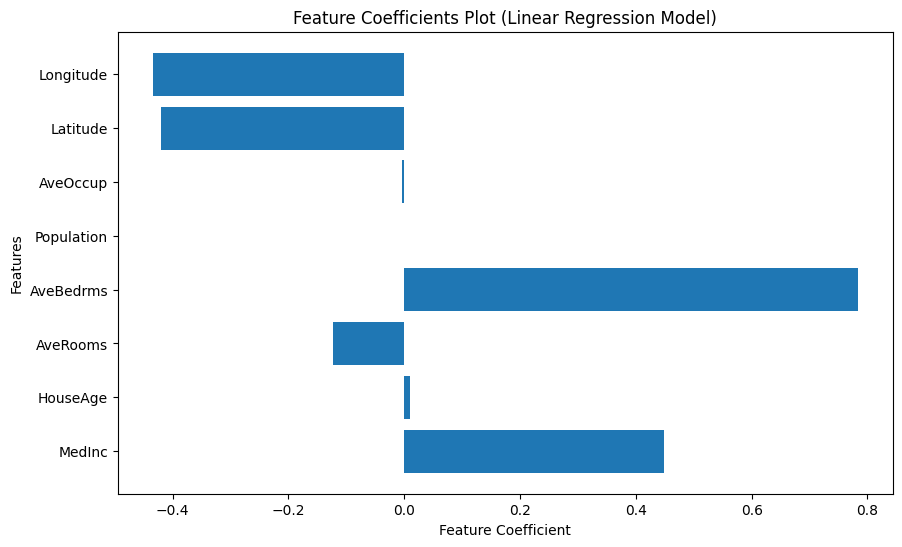

In [94]:
# Create a feature importance plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_coefficients)), feature_coefficients, tick_label=X.columns)
plt.xlabel('Feature Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients Plot (Linear Regression Model)')
plt.show()

#### Explanation:

We fit a Linear Regression model on the training data.
Then, we extract the feature coefficients using linear_regressor.coef_.
We create a horizontal bar plot to visualize the feature coefficients.

####  Produce Partial Dependence Plot for One Feature (XGBoost and Linear Regression):

Partial dependence plots help us understand the relationship between a specific feature and the predicted target while keeping other features constant. Here's how to create partial dependence plots for one feature for both models:

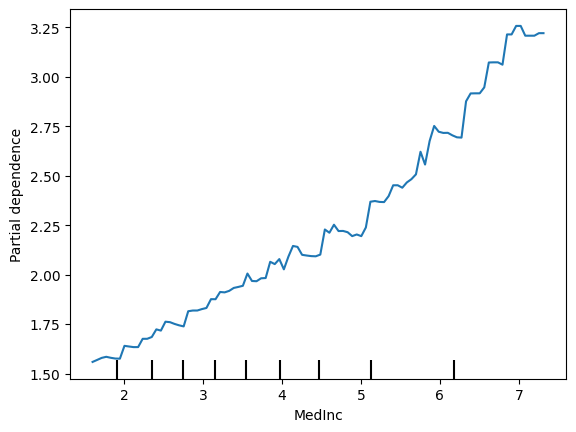

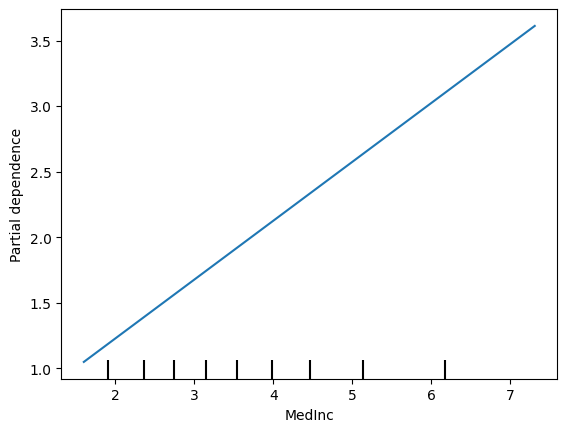

In [101]:
# Import the necessary libraries for partial dependence display
from sklearn.inspection import PartialDependenceDisplay

# Select the feature you want to analyze (e.g., 'MedInc')
feature_to_plot = 'MedInc'

# Create a PartialDependenceDisplay object for XGBoost model
xgb_partial_dependence_display = PartialDependenceDisplay.from_estimator(
    xgb_regressor, X_train, features=[feature_to_plot]
)

# Create a PartialDependenceDisplay object for Linear Regression model
linear_partial_dependence_display = PartialDependenceDisplay.from_estimator(
    linear_regressor, X_train, features=[feature_to_plot]
)